In [19]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# GENERAL PLOT OPTIONS
# GENERAL PLOT OPTIONS
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams['xtick.bottom'] = True
matplotlib.rcParams['xtick.top'] = False
matplotlib.rcParams['ytick.right'] = False
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['axes.linewidth'] = '1.0'
matplotlib.rcParams['axes.labelsize'] = 'medium'
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['grid.linewidth'] = '0.0'
matplotlib.rcParams['grid.alpha'] = '0.18'
matplotlib.rcParams['grid.color'] = 'lightgray'
matplotlib.rcParams['legend.labelspacing'] = 0.77
matplotlib.rcParams['savefig.bbox'] = 'tight'
matplotlib.rcParams['savefig.format'] = 'pdf'

from scipy.interpolate import interp1d
from scipy.integrate import quad

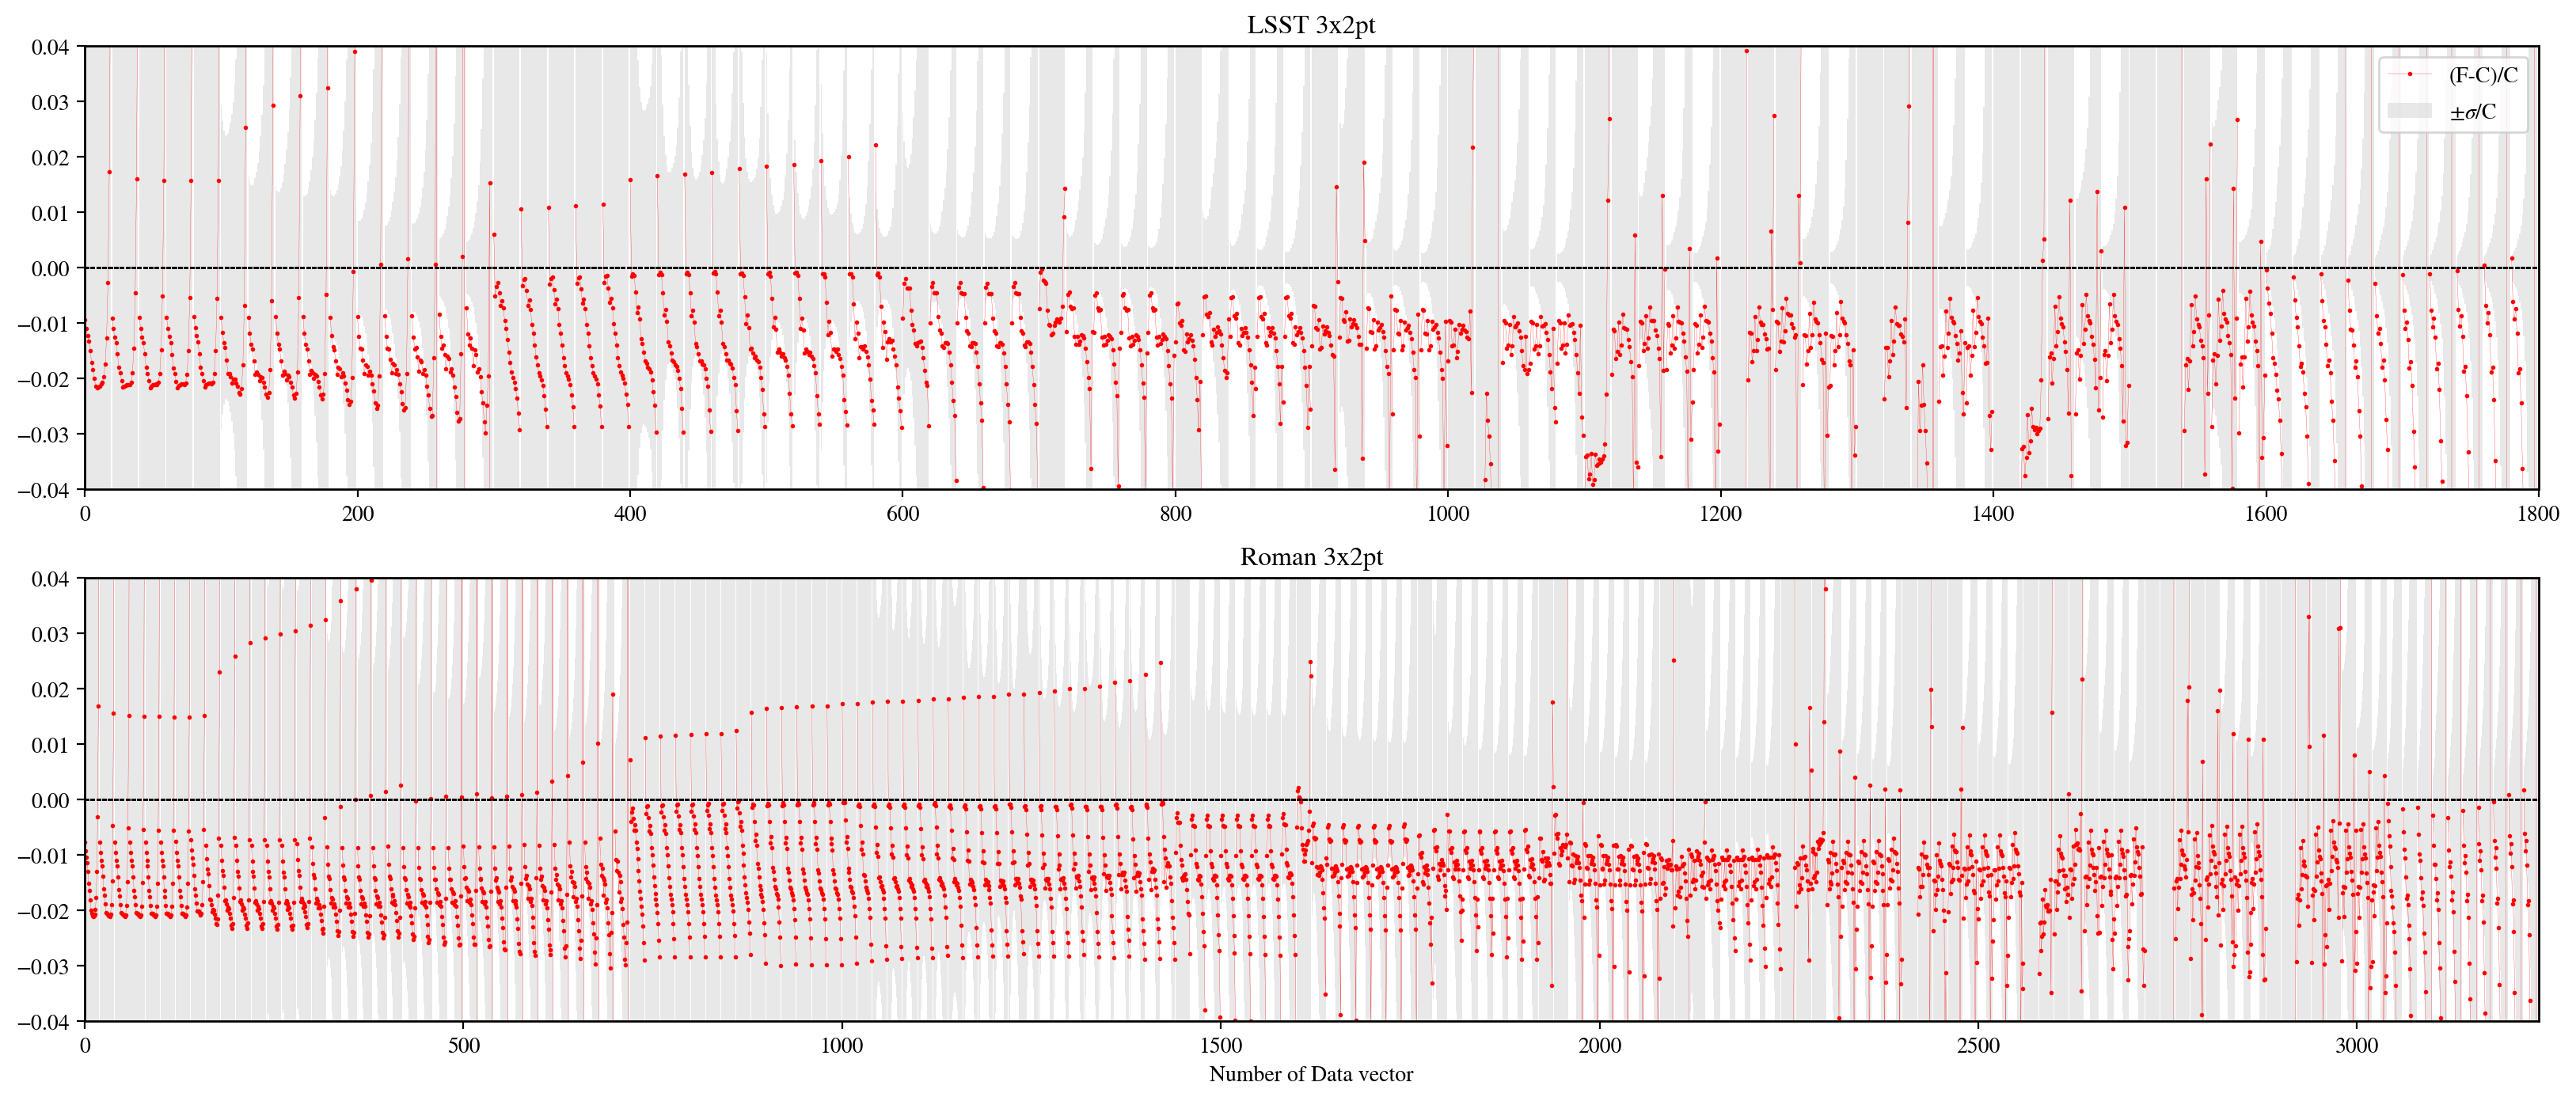

In [23]:
import matplotlib.pyplot as plt

#load LSST data
import numpy as np

nlens = 10
nsrcs = 5
ntheta=20
tmin = 1
tmax = 500

dvF_file = './data/lsst_real/firecrown_theory.txt'
dvC_file = './data/lsst_real/lsst_takahashi.modelvector'
sigmas_file = './data/lsst_real/sigmas.npy'
mask_file = './data/lsst_real/lsst_Y3.mask'

dvF = np.loadtxt(dvF_file)
dvC = np.loadtxt(dvC_file)[:,1]
mask = np.loadtxt(mask_file)[:,1]
sigmas = np.load(sigmas_file)

#define plot function
def plot_assemble(axs, cnt, probe, combo):
    l,r = int(cnt*ntheta), int(cnt+1)*ntheta
    thetas = np.arange(int(cnt)*20, int(cnt+1)*20)
    
    delta = (dvF[l:r] - dvC[l:r])/dvC[l:r]
    axs.plot(thetas, delta, marker='o',color='r',markersize=1,linewidth=0.1)
    sigmas_seg = np.sqrt(sigmas[l:r])
    axs.fill_between(thetas,-sigmas_seg/dvC[l:r],+sigmas_seg/dvC[l:r],step='mid',facecolor='lightgray',alpha=0.5)
    axs.axhline(xmin=0,xmax=1,y=0.0,color='k',linestyle='--',linewidth=0.5)
    axs.set_ylim(-0.1, 0.1)

#assemble
fig,ax = plt.subplots(2,1,figsize=(20,8))
cnt = 0

#initiate legends
l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
plot_assemble(ax[0], cnt, probe=r'$\xi^+$', combo=f'{0}x{0}')
cnt+=1
ax[0].legend(['(F-C)/C', r'$\pm\sigma$/C'])

#start loop
for i in range(nsrcs):
    for j in range(i, nsrcs):
        if(i==0 and j==0):
            continue
        l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
        plot_assemble(ax[0], cnt, probe=r'$\xi^+$', combo=f'{i}x{j}')
        cnt+=1
for i in range(nsrcs):
    for j in range(i, nsrcs):
        l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
        plot_assemble(ax[0], cnt, probe=r'$\xi^-$', combo=f'{i}x{j}')
        cnt+=1
for i in range(nlens):
    for j in range(nsrcs):
        l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
        plot_assemble(ax[0], cnt, probe=r'$\gamma t$', combo=f'{i}x{j}')
        cnt+=1
for i in range(nlens):
    l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
    plot_assemble(ax[0], cnt, probe=r'$W(\theta)$', combo=f'{i}x{i}')
    cnt+=1
    
#general settings for plot
ax[0].set_title('LSST 3x2pt')
ax[0].set_xlabel('')
ax[0].set_ylim(-0.04, 0.04)
ax[0].set_xlim(0, cnt*ntheta)

#load Roman data
import numpy as np

nlens = 10
nsrcs = 8
ntheta=20
tmin = 1
tmax = 500

dvF_file = './data/roman_real/firecrown_theory.txt'
dvC_file = './data/roman_real/roman_takahashi.modelvector'
sigmas_file = './data/roman_real/sigmas.npy'
mask_file = './data/roman_real/roman_Y3.mask'

dvF = np.loadtxt(dvF_file)
dvC = np.loadtxt(dvC_file)[:,1]
mask = np.loadtxt(mask_file)[:,1]
sigmas = np.load(sigmas_file)

#restart whole process
cnt = 0

#start loop
for i in range(nsrcs):
    for j in range(i, nsrcs):
        l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
        plot_assemble(ax[1], cnt, probe=r'$\xi^+$', combo=f'{i}x{j}')
        cnt+=1
for i in range(nsrcs):
    for j in range(i, nsrcs):
        l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
        plot_assemble(ax[1], cnt, probe=r'$\xi^-$', combo=f'{i}x{j}')
        cnt+=1
for i in range(nlens):
    for j in range(nsrcs):
        l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
        plot_assemble(ax[1], cnt, probe=r'$\gamma t$', combo=f'{i}x{j}')
        cnt+=1
for i in range(nlens):
    l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
    plot_assemble(ax[1], cnt, probe=r'$W(\theta)$', combo=f'{i}x{i}')
    cnt+=1
    
#general settings for plot
ax[1].set_xlabel('Number of Data vector')
ax[1].set_title('Roman 3x2pt')
ax[1].set_ylim(-0.04, 0.04)
ax[1].set_xlim(0, cnt*ntheta)

plt.savefig('data_vector_comparison.jpg',dpi=300)
plt.show()
